In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [217]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
combine = [df_train, df_test]

### Analysing the given dataset

In [218]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [219]:
df_test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [220]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Numerical Values: PassengeId, Survived, PClass, Age, SibSp, Parch, Fare

{continuous: Age, Fare}
{discrete: SibSp, Parch}
    
Categorical Values: Name, Sex, Cabin

{nominal: Sex}
{ordinal: Cabin}

AlphaNumerical: Ticket, Cabin

In [221]:
df_train.info()
print('-'*50)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

This describes the number of interger and float values. Also the object columns.

In [222]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.


In [223]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rouse, Mr. Richard Henry",male,1601,G6,S
freq,1,577,7,4,644


### What is the distribution of categorical features?

* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Correlating.

* We want to know how well does each feature correlate with Survival. 
* We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

### Completing.

* We may want to complete Age feature as it is definitely correlated to survival.
* We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

### Correcting.

* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

### Creating.

* We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
* We may want to engineer the Name feature to extract Title as a new feature.
* We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a Fare range feature if it helps our analysis.

### Classifying.

We may also add to our assumptions based on the problem description noted earlier.

* Women (Sex=female) were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.

## Univariate Analysis

### Pclass

In [224]:
pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


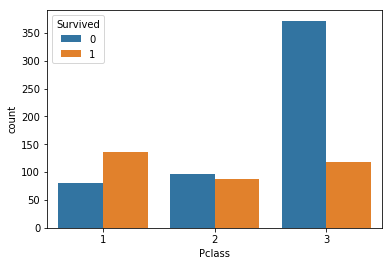

In [225]:
sns.countplot(df_train['Pclass'], hue=df_train['Survived'])

## Sex

In [226]:
pd.crosstab(df_train['Sex'], df_train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


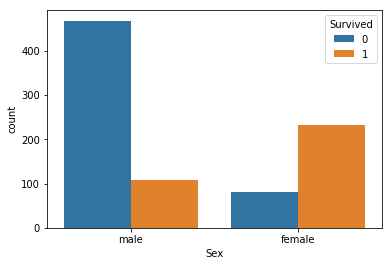

In [227]:
sns.countplot(df_train['Sex'], hue=df_train['Survived'])

## Age

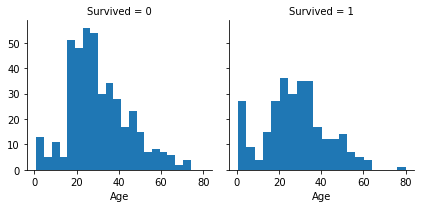

In [228]:
sns.FacetGrid(df_train, col='Survived').map(plt.hist, 'Age', bins=20)

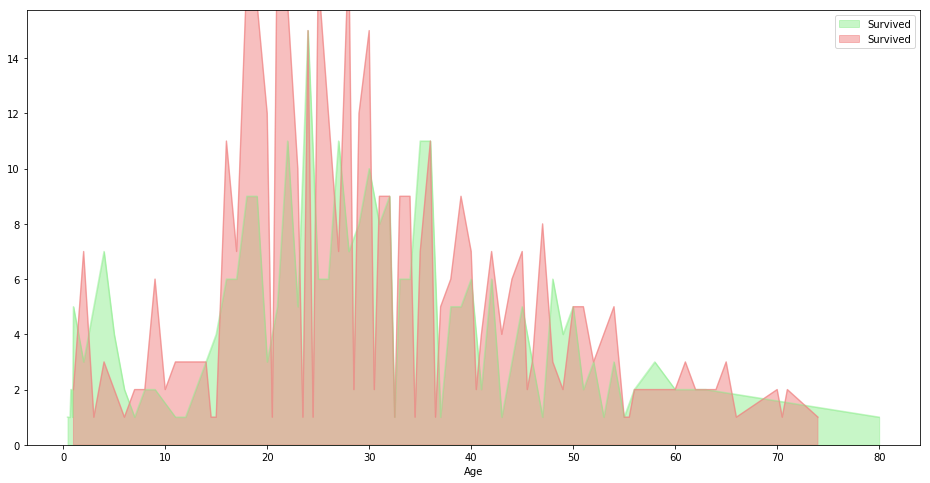

In [229]:
ageSurvived = df_train[['Age', 'Survived']][df_train['Survived']==1].groupby('Age').count()
ageNotSurvived = df_train[['Age', 'Survived']][df_train['Survived']==0].groupby('Age').count()

ax = ageSurvived.plot(kind='area', figsize=(16,8), stacked=False, color='lightgreen')

ageNotSurvived.plot(kind='area', figsize=(16,8), stacked=False, color='lightcoral', ax = ax)

Age <5 and 80 has more chances of survival

### Embarked

In [230]:
pd.crosstab(df_train['Embarked'], df_train['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


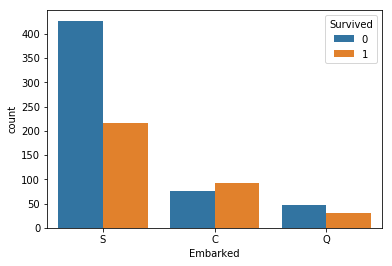

In [231]:
sns.countplot(df_train['Embarked'], hue=df_train['Survived'])

### Parch

In [232]:
pd.crosstab(df_train['Parch'], df_train['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


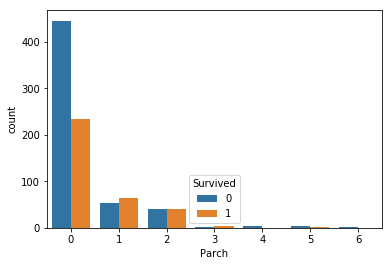

In [233]:
sns.countplot(df_train['Parch'], hue=df_train['Survived'])

### SibSp

In [234]:
pd.crosstab(df_train['SibSp'], df_train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


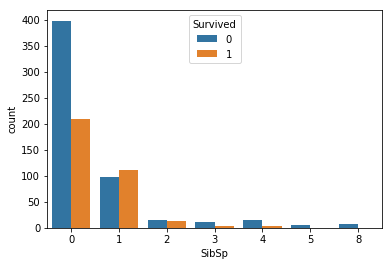

In [235]:
sns.countplot(df_train['SibSp'], hue=df_train['Survived'])

### Fare

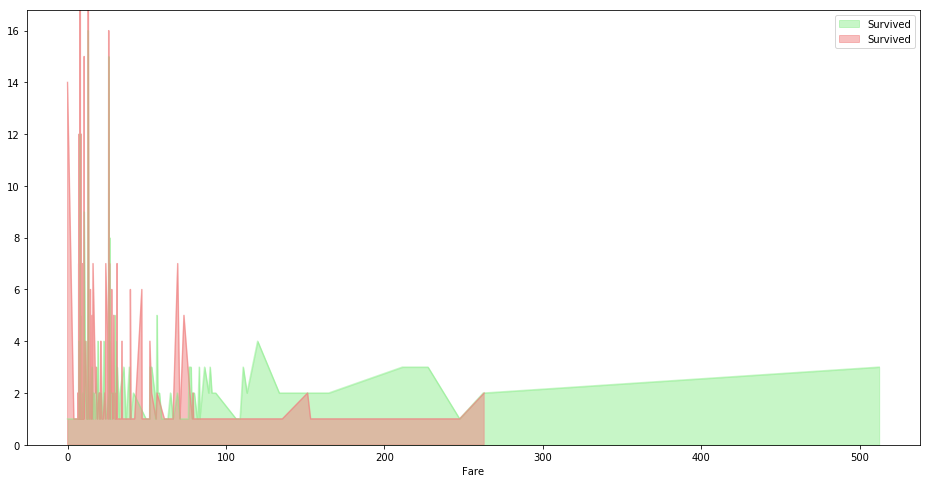

In [236]:
fareSurvived=df_train[['Fare', 'Survived']][df_train['Survived']==1].groupby('Fare').count()
fareNotSurvived=df_train[['Fare', 'Survived']][df_train['Survived']==0].groupby('Fare').count()

ax = fareSurvived.plot(kind = 'Area', figsize=(16,8), stacked=False, color='lightgreen')

ax = fareNotSurvived.plot(kind = 'Area', figsize=(16,8), stacked=False, color='lightcoral', ax=ax)

we can pd.qcut the Fare and analyse

C:\Users\ankur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


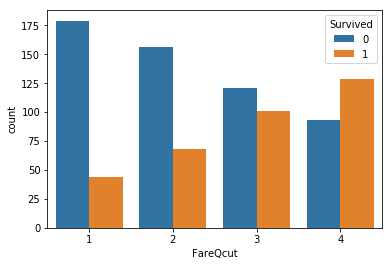

In [237]:
fareQcutSurvived = df_train[['Fare', 'Survived']]
fareQcutSurvived['FareQcut'] = pd.qcut(fareQcutSurvived['Fare'], 4, labels = [1,2,3,4])
sns.countplot(fareQcutSurvived['FareQcut'], hue=fareQcutSurvived['Survived'])

## Bivariate Analysis

### Age + Sex

C:\Users\ankur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ankur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ankur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ankur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


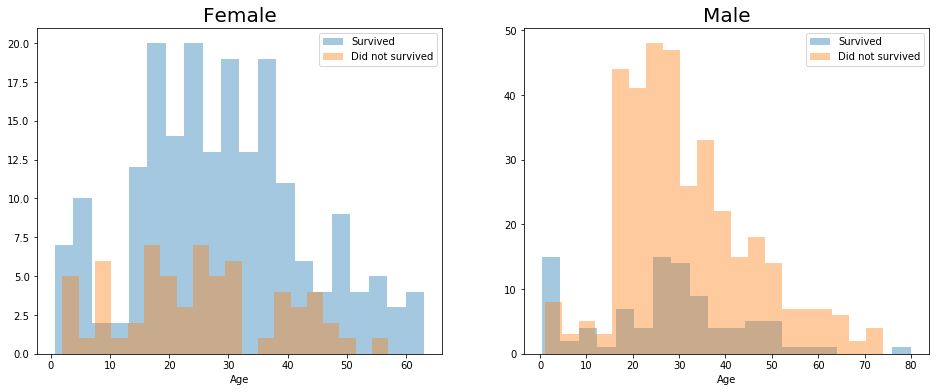

In [238]:
female = df_train[df_train['Sex']=='female']
male = df_train[df_train['Sex']=='male']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))


ax = sns.distplot(female[female['Survived']==1].Age.dropna(),
                  bins=20,
                  label = 'Survived',
                  ax = axes[0],
                  kde =False)

ax = sns.distplot(female[female['Survived']==0].Age.dropna(),
                  bins=20,
                  label = 'Did not survived',
                  ax = axes[0],
                  kde =False)
ax.legend()
ax.set_title('Female',size=20)

ax = sns.distplot(male[male['Survived']==1].Age.dropna(),
                  bins=20,
                  label = 'Survived',
                  ax = axes[1],
                  kde = False)

ax = sns.distplot(male[male['Survived']==0].Age.dropna(),
                  bins=20,
                  label = 'Did not survived',
                  ax = axes[1],
                  kde = False)
ax.legend()
_ = ax.set_title('Male',size=20)

## SibSp + Parch

C:\Users\ankur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


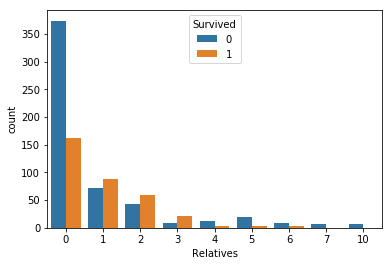

In [239]:
data = df_train[['Survived']]
data['Relatives'] = df_train['SibSp'] + df_train['Parch']
sns.countplot(data['Relatives'], hue=data['Survived'])

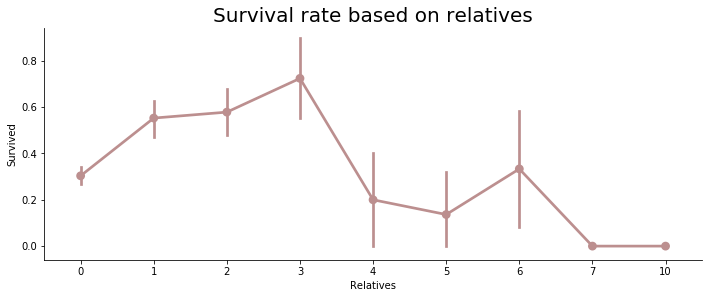

In [240]:
g = sns.factorplot(x='Relatives',
                   y='Survived',
                   data=data,
                   aspect = 2.5,
                   color='rosybrown')

_ = g.axes.flatten()[0].set_title('Survival rate based on relatives', size=20)

It is observed that people with 1, 2 or 3 relatives have more chances of survival.

## Cabin

We will convert the first letter to deck 

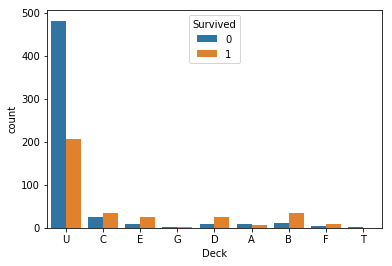

In [241]:
train_copy = df_train.copy()
train_copy['Cabin'].fillna('U00', inplace=True)
train_copy['Deck'] = train_copy['Cabin'].astype(str).str[0]

sns.countplot(train_copy['Deck'], hue=train_copy['Survived'])

Decks D, E have high survival rate
Missing Datas have lower survival rate

# Feature Engineering - Data Cleaning & Preprocessing

Dropping the Features we dont need for both train and test data

In [242]:
for df in [df_train, df_test]:
    df.drop(['PassengerId','Ticket'], axis=1, inplace=True)

In [243]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Creating new feature

Search for Name column and get the titles from both the train and test data combined. We can analyse the number of people survived also fill the NAN Age with the mean of the titles created.

extract(' ([A-Za-z]+)\.') searches for the first word ending with '.'

expand=False returns a dataframe

In [244]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [245]:
for df in [df_train, df_test] :
    df['Title'].replace(['Dona','Lady','Mme','Countess','Ms'],'Mrs',inplace=True)
    df['Title'].replace(['Mlle'],'Miss',inplace=True)
    df['Title'].replace(['Sir','Capt','Don','Jonkheer','Col','Major','Rev','Dr','Major'],'Mr',inplace=True)
    df.drop(['Name'], axis=1,inplace=True)

In [246]:
df_train['Title'].value_counts()

Mr        538
Miss      184
Mrs       129
Master     40
Name: Title, dtype: int64

In [247]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
5,0,3,male,NaN,0,0,8.4583,NaN,Q,Mr
6,0,1,male,54.0,0,0,51.8625,E46,S,Mr
7,0,3,male,2.0,3,1,21.0750,NaN,S,Master
8,1,3,female,27.0,0,2,11.1333,NaN,S,Mrs
9,1,2,female,14.0,1,0,30.0708,NaN,C,Mrs


# Relatives = Sibsp + Parch

We saw earlier that the number of relatives had its influence on the surival rate, we assume that:

Passengers with 1 to 3 relatives on board had better chance to survive.
The survival rate of passenger with less than 1 or more than 3 relatives is more lower.
let's create that new feature to take it into account and group it into 3 groups :

0 : the passenger is alone

1 : the passenger has between 1 and 3 relatives on board

3 : the passenger has more than 3 relatives on board

In [248]:
for df in [df_train, df_test] :
    df['RelativesGroup'] = 0
    df['Relatives'] = df['Parch'] + df['SibSp']
    df.loc[(df['Relatives'] > 0) & (df['Relatives'] <= 3), 'RelativesGroup'] = 1
    df.loc[(df['Relatives'] >= 4), 'RelativesGroup'] = 2
    df.drop(['Relatives','Parch','SibSp'], axis=1,inplace=True)
    df['RelativesGroup'] = df['RelativesGroup'].astype('category')

In [249]:
df_train['RelativesGroup'].value_counts()

0    537
1    292
2     62
Name: RelativesGroup, dtype: int64

## Missing Values

In [250]:
df_train.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age               177
Fare                0
Cabin             687
Embarked            2
Title               0
RelativesGroup      0
dtype: int64

In [251]:
df_test.isnull().sum()

Pclass              0
Sex                 0
Age                86
Fare                1
Cabin             327
Embarked            0
Title               0
RelativesGroup      0
dtype: int64

### Age

Group by Title and fill the mean to the empty fields.

In [252]:
for df in [df_train, df_test]:
    df['Age'] = df.groupby('Title')['Age'].apply(lambda x : x.fillna(x.mean()))

### Embarked (Train)

Only two missing values so will fill with the most common

In [253]:
common = df_train['Embarked'].describe()['top']
df_train['Embarked'].fillna(common, inplace = True)

### Fare (Test)

In [254]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)

### Cabin

As we saw earlier, we will juste mark passengers whose deck we could not identify, and make it a binary variable as follow :

In [255]:
for df in [df_train, df_test]:
    df['deckUnknown'] = 1
    df.loc[(df['Cabin'].isnull()), 'deckUnknown'] = 0
    df.drop(['Cabin'], axis = 1, inplace = True)

# Feature Scaling

In [256]:
scaler = MinMaxScaler()
for df in [df_train, df_test]:
    df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [257]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,RelativesGroup,deckUnknown
0,0,3,male,0.271174,0.014151,S,Mr,1,0
1,1,1,female,0.472229,0.139136,C,Mrs,1,1
2,1,3,female,0.321438,0.015469,S,Miss,0,0
3,1,1,female,0.434531,0.103644,S,Mrs,1,1
4,0,3,male,0.434531,0.015713,S,Mr,0,0


# OneHotEncoding

In [258]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female':1, 'male':0}).astype(int)
    
#   for df in [train, test]:
#        df['Sex'] = (df['Sex'] == "male").astype(int)

Cahange the Pclass to Category so that pd.get_dummies can do OneHotEncoding to it

In [259]:
for df in [df_train, df_test]:
    df['Pclass'] = df['Pclass'].astype('category')

In [260]:
df_train = pd.get_dummies(df_train, drop_first = True)
df_test = pd.get_dummies(df_test, drop_first = True)

In [261]:
df_train.head()

,Survived,Sex,Age,Fare,deckUnknown,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,RelativesGroup_1,RelativesGroup_2
0,0,0,0.271174,0.014151,0,0,1,0,1,0,1,0,1,0
1,1,1,0.472229,0.139136,1,0,0,0,0,0,0,1,1,0
2,1,1,0.321438,0.015469,0,0,1,0,1,1,0,0,0,0
3,1,1,0.434531,0.103644,1,0,0,0,1,0,0,1,1,0
4,0,0,0.434531,0.015713,0,0,1,0,1,0,1,0,0,0


In [262]:
df_test.head()

,Sex,Age,Fare,deckUnknown,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,RelativesGroup_1,RelativesGroup_2
0,0,0.452723,0.015282,0,0,1,1,0,0,1,0,0,0
1,1,0.617566,0.013663,0,0,1,0,1,0,0,1,1,0
2,0,0.815377,0.018909,0,1,0,1,0,0,1,0,0,0
3,0,0.353818,0.016908,0,0,1,0,1,0,1,0,0,0
4,1,0.287881,0.023984,0,0,1,0,1,0,0,1,1,0


# Feature Modeling

In [263]:
X = df_train.drop('Survived', axis = 1)
y = df_train['Survived']

In [264]:
rfr = RandomForestClassifier(random_state=42)

rfr.fit(X, y)

rfr_pred = rfr.predict(X)

rfr_acc = accuracy_score(y, rfr_pred)

print('Accuracy on the whole train set: ',round(rfr_acc*100,2,),'%')

Accuracy on the whole train set:  96.97 %


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X)
rfc_pred_test = rfc.predict(X_test)

rfc_acc_train = accuracy_score(y, rfc_pred_train)
rfc_acc_test = accuracy_score(y_test, rfc_pred_test)
print('Accuracy on the whole train set: ',round(rfc_acc_train*100,2,),'%')
print('Accuracy on the whole test set: ',round(rfc_acc_test*100,2,),'%')

Accuracy on the whole train set:  94.16 %
Accuracy on the whole test set:  84.33 %


Indeed, our model overfits the data, the performance dropped drastically in the test set: the model has difficulty in generalizing to unkown data.

Cross validation is a device used to defend the model from overfitting, it fights tendencies in the direction of complexity.

We will try to reduce this overfitting by tunning the hyperparameters of the model and hope it will perform well.

To do that, we will use grid search on the train set, it will perform cross-validations to do the hyperparameter search.

In [266]:
# param_grid = { "criterion" : ["gini", "entropy"],
#               "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
#               "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
#               "n_estimators": [100, 400, 700, 1000, 1500]}

# from sklearn.model_selection import GridSearchCV, cross_val_score

# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1,verbose=10)
# clf.fit(X_train, y_train)

# clf.best_params_

In [267]:
rfr = RandomForestClassifier(criterion = "entropy", 
                              min_samples_leaf = 5,
                              min_samples_split = 12,
                              n_estimators=400,
                              random_state=42,
                              n_jobs=-1)
rfr.fit(X_train, y_train)

rfr_pred_train = rfr.predict(X_train)
rfr_pred_test = rfr.predict(X_test)

rfr_ac_train = accuracy_score(y_train, rfr_pred_train)
rfr_ac_test = accuracy_score(y_test, rfr_pred_test)

print('Accuracy on the train set: ',round(rfr_ac_train*100,2,),'%')
print('Accuracy on the test set: \t',round(rfr_ac_test*100,2,),'%')

Accuracy on the train set:  85.47 %
Accuracy on the test set: 	 83.58 %


### Cross - Validation check

In [268]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 10)

In [269]:
accuracies.mean()

0.8309229892914104

In [270]:
accuracies.std()

0.054036632371879535

# Submission

Now that we have our hyper-parameters, I think it's possible to train our model on the whole train set. As we feed it with more data, this could (should?) Improve the performance of the model.

In [271]:
rfr.fit(X,y)

rfr.pred = rfr.predict(df_test)

In [275]:
test = pd.read_csv('test.csv')
submission_final = pd.DataFrame( {'PassengerId': test['PassengerId'], 'Survived': rfr.pred} )
submission_final.to_csv('submissionfinal.csv', index=False)